In [12]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
fashion_mnist = keras.datasets.fashion_mnist;

In [14]:
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data();

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
print(X_train_full.shape);
print(Y_train_full.shape);
print(X_test.shape);
print(Y_test.shape);

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0;
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:];

In [17]:
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta", "sandalia", "camiseta", "tenis", "bolsa", "bota"];

In [18]:
nomes_classes[Y_train[0]];

In [19]:
X_train[0];

camiseta


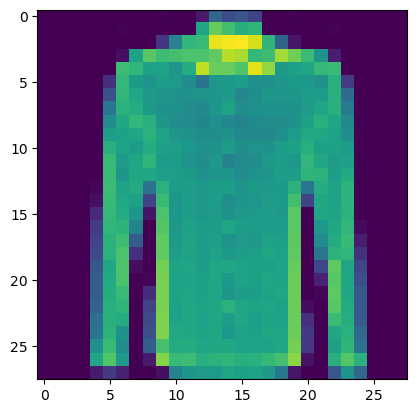

In [22]:
exemplo_n = 15;
print(nomes_classes[Y_train[exemplo_n]]);
plt.imshow(X_train[exemplo_n], interpolation = "nearest");
plt.show();

In [23]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape = [28, 28]));
model.add(keras.layers.Dense(300, activation = "relu"));
model.add(keras.layers.Dropout(rate = 0.1));
model.add(keras.layers.Dense(100, activation = "relu"));
model.add(keras.layers.Dropout(rate = 0.1));
model.add(keras.layers.Dense(10, activation = "softmax"));

c:\Users\Bruno\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Unrecognized keyword arguments passed to Dense: {'acvation': 'relu'}

In [ ]:
model.summary();

In [ ]:
model.compile(loss="spare_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"]);

In [ ]:
history = model.fit(X_train, Y_train, epochs = 5 validation_data=(X_valid, Y_valid));

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,8));
plt.grid(True);
plt.gca().set_ylim(0,1);
plt.show();

In [ ]:
model.evaluate(X_test, Y_test, verbose = 1);

In [ ]:
X_novo = X_test[:4];
Y_proba = model.predict(X_novo);
Y_proba

In [ ]:
Y_pred = model.predict_classes(X_novo);
print(Y_pred);
print(np.array(nomes_classes)[Y_pred]);

In [ ]:
Y_novo = Y_test[:4];
print(Y_novo);
np.array(nomes_classes)[Y_pred];
print(nomes_classes[Y_pred[1]]);
plt.imshow(X_novo[1], interpolation="nearest");
plt.show();